The input dataset we used for our example is a simple 2D binary dataset representing the XOR function. The XOR, or "exclusive or", function is an operation on two logical inputs that outputs true only when the number of true inputs is odd. In other words, for two inputs, the XOR function outputs true when exactly one of the inputs is true. 

In [7]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Input dataset
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])

# Outputs we expect 
expected_output = np.array([[0],[1],[1],[0]])

# Initialize weights
inputLayer_neurons = 2 
hiddenLayer_neurons = 2
outputLayer_neurons = 1

weights_input_hidden = np.random.uniform(size=(inputLayer_neurons,hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(size=(hiddenLayer_neurons,outputLayer_neurons))

# Error list
error_over_time = []

# Training algorithm
for _ in range(50000):
    # Forward Propagation
    hidden_layer_activation = np.dot(inputs,weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output,weights_hidden_output)
    predicted_output = sigmoid(output_layer_activation)

    # Backpropagation
    error = expected_output - predicted_output
    error_over_time.append(np.sum(np.square(error)))  # Add sum of squared error to the error list

    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Updating Weights and Biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * 0.1
    weights_input_hidden += inputs.T.dot(d_hidden_layer) * 0.1


In [8]:
print(predicted_output)

[[0.0581361 ]
 [0.89290159]
 [0.8929019 ]
 [0.14214669]]


In [5]:
import matplotlib.pyplot as plt

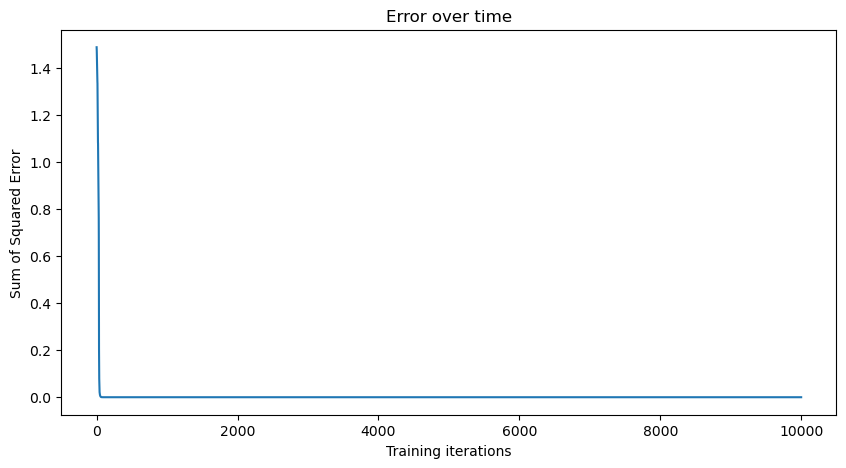

In [14]:
# Plotting the error over time
plt.figure(figsize=(10,5))
plt.plot(error_over_time)
plt.title('Error over time')
plt.xlabel('Training iterations')
plt.ylabel('Sum of Squared Error')
plt.show()

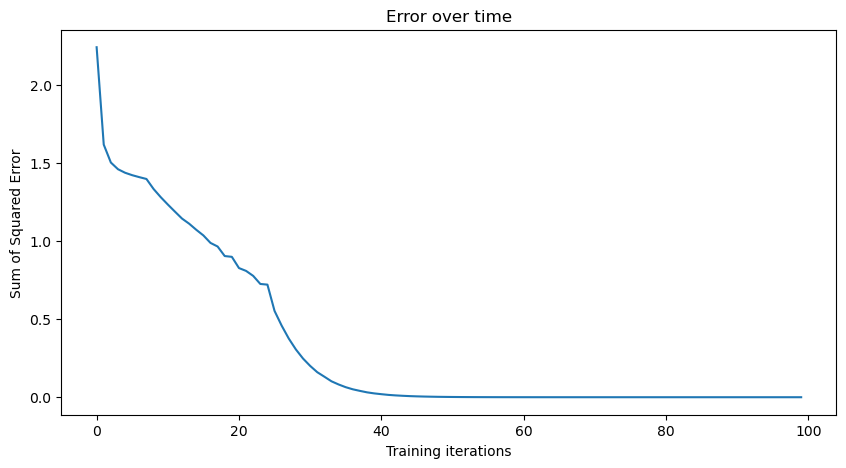

In [16]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

# Input dataset
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])

# Outputs we expect 
expected_output = np.array([[0],[1],[1],[0]])

# Initialize weights
inputLayer_neurons = 2 
hiddenLayer_neurons = 2
outputLayer_neurons = 1

weights_input_hidden = np.random.uniform(size=(inputLayer_neurons,hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(size=(hiddenLayer_neurons,outputLayer_neurons))

# Error list
error_over_time = []

# Training algorithm
for _ in range(100):
    # Forward Propagation
    hidden_layer_activation = np.dot(inputs,weights_input_hidden)
    hidden_layer_output = relu(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output,weights_hidden_output)
    predicted_output = relu(output_layer_activation)

    # Backpropagation
    error = expected_output - predicted_output
    error_over_time.append(np.sum(np.square(error)))  # Add sum of squared error to the error list
    
    d_predicted_output = error * relu_derivative(predicted_output)
    
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * relu_derivative(hidden_layer_output)

    # Updating Weights and Biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * 0.1
    weights_input_hidden += inputs.T.dot(d_hidden_layer) * 0.1

# Plotting the error over time
plt.figure(figsize=(10,5))
plt.plot(error_over_time)
plt.title('Error over time')
plt.xlabel('Training iterations')
plt.ylabel('Sum of Squared Error')
plt.show()